In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Bow_data = pd.read_csv('.\dataset\Bow.csv')
Bow_data = Bow_data.to_numpy()

Sword_data = pd.read_csv('.\dataset\Sword.csv')
Sword_data = Sword_data.to_numpy()

Pistol_data = pd.read_csv('.\dataset\Pistol.csv')
Pistol_data = Pistol_data.to_numpy()

Rifle_data = pd.read_csv('.\dataset\Rifle.csv')
Rifle_data = Rifle_data.to_numpy()

Spear_data = pd.read_csv('.\dataset\Spear.csv')
Spear_data = Spear_data.to_numpy()

Grenade_data = pd.read_csv('.\dataset\Grenade.csv')
Grenade_data = Grenade_data.to_numpy()

print(Bow_data.shape)
print(Sword_data.shape)
print(Pistol_data.shape)
print(Rifle_data.shape)
print(Spear_data.shape)
print(Grenade_data.shape)

(4000, 115)
(4000, 115)
(4000, 115)
(4000, 115)
(4000, 115)
(4000, 115)


In [3]:
Bow_data_Seq = []
Sword_data_Seq= []
Pistol_data_Seq = []
Rifle_data_Seq = []
Spear_data_Seq = []
Grenade_data_Seq = []


Objects = ['Bow','Sword', 'Pistol', 'Rifle', 'Spear', 'Grenade']
WindowSize = 80

In [ ]:

# def Create_Sequences(data, window_size):
#     """
#     주어진 데이터와 윈도우 크기를 기반으로 시퀀스를 생성합니다.

#     Args:
#         data (list or np.ndarray): 입력 데이터
#         window_size (int): 시퀀스의 윈도우 크기

#     Returns:
#         np.ndarray: 생성된 시퀀스 배열
#     """
    
#     Sequences = []
#     for seq in range(len(data) - window_size):
#         Sequences.append(data[seq:seq + window_size])
#     return np.array(Sequences)



def Create_Sequences(data, max_frame_count, window_size):
    # Sequences = []
    # for part in range(len(data) / max_frame_count):    
    #     #for seq in range(max_frame_count - window_size):
    #     for seq in range(part * max_frame_count, part * max_frame_count + (max_frame_count - window_size)):
    #         #Sequences.append(data[part * max_frame_count + seq : part * max_frame_count + seq + window_size])
    #         Sequences.append(data[seq : seq + window_size])
    
    Sequences = []
    for part in range(len(data) / max_frame_count):    
        for seq in range(part * max_frame_count, part * max_frame_count + (max_frame_count - window_size)):
            Sequences.append(data[seq : seq + window_size])
            
    return np.array(Sequences)


In [5]:
Bow_data_Seq = Create_Sequences(Bow_data, WindowSize)
Sword_data_Seq = Create_Sequences(Sword_data, WindowSize)
Pistol_data_Seq = Create_Sequences(Pistol_data, WindowSize)
Rifle_data_Seq = Create_Sequences(Rifle_data, WindowSize)
Spear_data_Seq = Create_Sequences(Spear_data, WindowSize)
Grenade_data_Seq = Create_Sequences(Grenade_data, WindowSize)

In [7]:
print(Bow_data_Seq.shape)
print(Sword_data_Seq.shape)
print(Pistol_data_Seq.shape)
print(Rifle_data_Seq.shape)
print(Spear_data_Seq.shape)
print(Grenade_data_Seq.shape)

(3920, 80, 115)
(3920, 80, 115)
(3920, 80, 115)
(3920, 80, 115)
(3920, 80, 115)
(3920, 80, 115)


In [8]:
ConcatenatedSeqData = np.concatenate([Bow_data_Seq, Sword_data_Seq , Pistol_data_Seq, Rifle_data_Seq, Spear_data_Seq, Grenade_data_Seq], axis=0)

ConcatenatedSeqData.shape

(23520, 80, 115)

In [ ]:
X_data = ConcatenatedSeqData[:, :, :-1]
Labels = ConcatenatedSeqData[:, 0, -1]-1  # idle 추가하거나 제거하면 -1 빼야함. (임시로 해둔거)

print(X_data.shape)
print(X_data)

print(Labels.shape)
print(Labels)

(23520, 80, 114)
[[[ 3.8565200e-01  2.0344400e-01  4.9849880e+00 ... -5.6122120e+00
   -5.8692560e+00  3.9162500e-01]
  [ 3.8057500e-01 -2.6803000e-02  4.2351500e+00 ... -5.6155940e+00
   -5.3515880e+00  3.6455900e-01]
  [ 3.4456200e-01 -1.3052100e-01  3.5091060e+00 ... -5.6188260e+00
   -4.8229290e+00  3.3690800e-01]
  ...
  [-8.3564640e+00  4.0254690e+00 -4.0189300e-01 ... -3.9023610e+00
   -6.3357493e+01  2.7356640e+00]
  [-6.6339890e+00  3.0092830e+00 -3.0058300e-01 ... -3.8886450e+00
   -6.3644679e+01  2.7420410e+00]
  [-1.4187516e+01  4.9266400e+00 -2.9101950e+00 ... -3.8807410e+00
   -6.3810074e+01  2.7456820e+00]]

 [[ 3.8057500e-01 -2.6803000e-02  4.2351500e+00 ... -5.6155940e+00
   -5.3515880e+00  3.6455900e-01]
  [ 3.4456200e-01 -1.3052100e-01  3.5091060e+00 ... -5.6188260e+00
   -4.8229290e+00  3.3690800e-01]
  [ 9.6457000e-02 -2.0546900e-01  5.0064500e+00 ... -5.6221810e+00
   -4.2203810e+00  3.0532900e-01]
  ...
  [-6.6339890e+00  3.0092830e+00 -3.0058300e-01 ... -3.88864

In [10]:
from tensorflow.keras.utils import to_categorical

Y_data = to_categorical(Labels, num_classes=len(Objects))

print(Y_data)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [11]:
from sklearn.model_selection import train_test_split

X_data = X_data.astype(np.float32)
Y_data = Y_data.astype(np.float32)

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=2024)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(18816, 80, 114) (18816, 6)
(4704, 80, 114) (4704, 6)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='tanh', input_shape=X_train.shape[1:3]),
    Dense(32, activation='tanh'),
    Dense(len(Objects), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                45824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 48,102
Trainable params: 48,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model6.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'), # 다음 학습할때는 모델명 바꿔서!
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
588/588 [==============================] - ETA: 0s - loss: 0.1097 - acc: 0.9820
Epoch 1: val_acc improved from -inf to 1.00000, saving model to models\model6.h5
588/588 [==============================] - 18s 30ms/step - loss: 0.1097 - acc: 0.9820 - val_loss: 0.0050 - val_acc: 1.0000 - lr: 0.0010
Epoch 2/50
587/588 [============================>.] - ETA: 0s - loss: 0.0026 - acc: 1.0000
Epoch 2: val_acc did not improve from 1.00000
588/588 [==============================] - 21s 35ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000 - lr: 0.0010
Epoch 3/50
587/588 [============================>.] - ETA: 0s - loss: 8.3696e-04 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
588/588 [==============================] - 21s 35ms/step - loss: 8.3642e-04 - acc: 1.0000 - val_loss: 5.7631e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/50
587/588 [============================>.] - ETA: 0s - loss: 4.3736e-04 - acc: 1.0000
Epoch 4: val_acc did not improve from 1

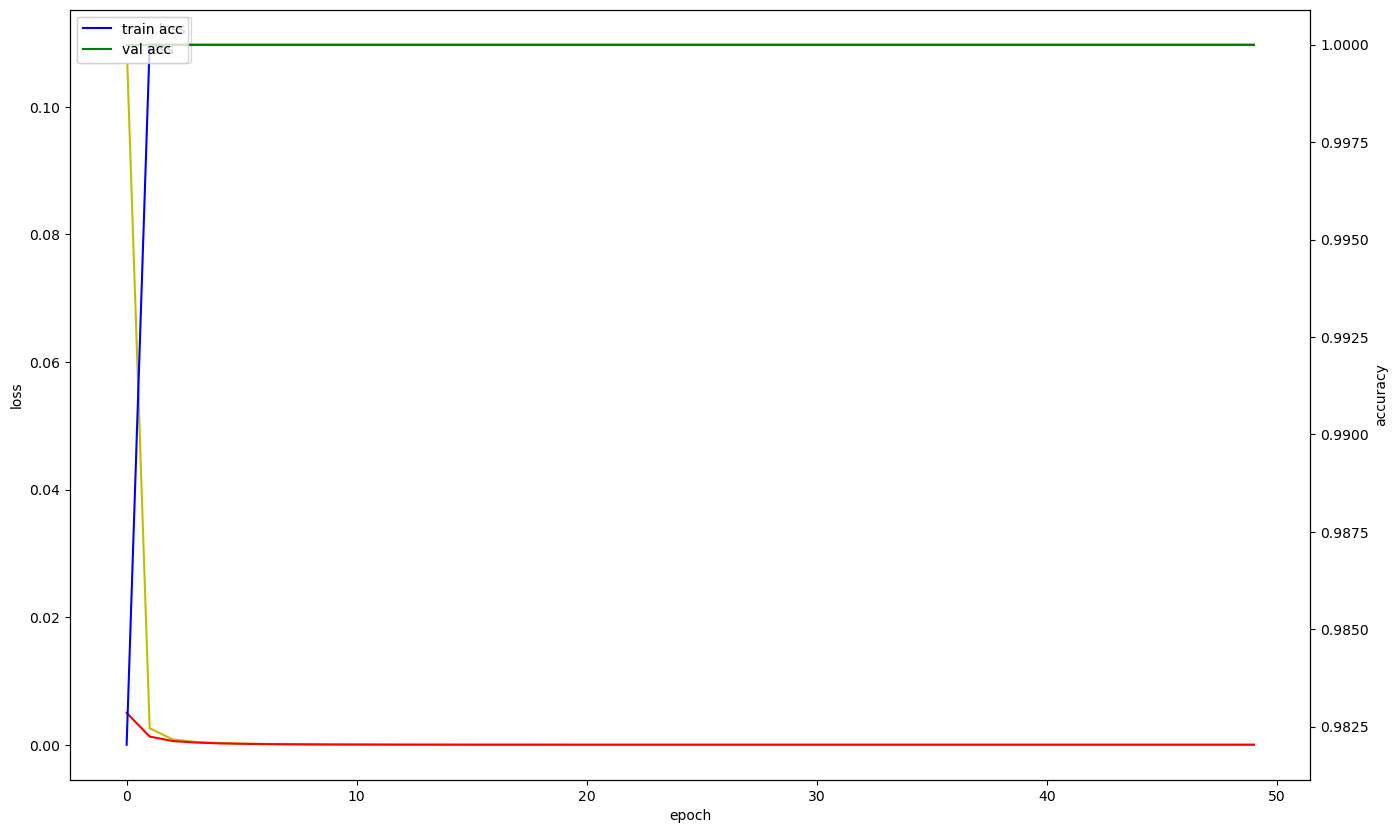

In [15]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
# import tensorflow as tf

# # .h5 모델 로드
# h5_model_path = "models\model6.h5"
# saved_model_path = "models\model6_tf"

# model = tf.keras.models.load_model(h5_model_path)

# # SavedModel 형식으로 저장
# tf.saved_model.save(model, saved_model_path)

# print(f"SavedModel saved at: {saved_model_path}")

# #tf python -m tf2onnx.convert --saved-model C:\Project\saved_model --output C:\Project\model2.onnx
# #python -m tf2onnx.convert --saved-model tensorflow-model-path --output model.onnx
# #python -m tf2onnx.convert --input model3.h5 --output model33.onnx
# #python -m tf2onnx.convert --saved-model path/to/saved_model --output model.onnx --input-shape "1,80,138"

In [16]:
import tf2onnx
import tensorflow as tf

# TensorFlow SavedModel 경로 및 변환된 ONNX 모델 저장 경로
saved_model_path = "models\model6.h5"
onnx_model_path = "models\model6.onnx"

# 변환에 사용할 입력 shape
input_signature = [tf.TensorSpec([1, 80, 114], tf.float32, name="input")]

# SavedModel 로드
model = tf.keras.models.load_model(saved_model_path)

# ONNX로 변환
offset = 0
onnx_model, _ = tf2onnx.convert.from_keras(
    model,
    input_signature=input_signature,
    opset=13  # ONNX opset 버전 지정 (13은 일반적으로 사용되는 버전)
)

# ONNX 모델 저장
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved at: {onnx_model_path}")

ONNX model saved at: models\model6.onnx


In [17]:
import onnx

# onnx 파일 구조 파악.
onnx_model = onnx.load("models\model6.onnx")
onnx.checker.check_model(onnx_model)

print(onnx.helper.printable_graph(onnx_model.graph))

graph tf2onnx (
  %input[FLOAT, 1x80x114]
) initializers (
  %sequential/dense_1/MatMul/ReadVariableOp:0[FLOAT, 32x6]
  %sequential/dense_1/BiasAdd/ReadVariableOp:0[FLOAT, 6]
  %sequential/dense/MatMul/ReadVariableOp:0[FLOAT, 64x32]
  %sequential/dense/BiasAdd/ReadVariableOp:0[FLOAT, 32]
  %new_shape__44[INT64, 3]
  %const_starts__39[INT64, 1]
  %const_fold_opt__45[FLOAT, 1x1x64]
  %const_ends__40[INT64, 1]
  %const_axes__41[INT64, 1]
  %const_axes__31[INT64, 1]
  %W0__25[FLOAT, 1x256x114]
  %R0__26[FLOAT, 1x256x64]
  %B0__27[FLOAT, 1x512]
) {
  %sequential/lstm/PartitionedCall/transpose:0 = Reshape(%input, %new_shape__44)
  %LSTM__28:0, %LSTM__28:1, %LSTM__28:2 = LSTM[activations = ['Sigmoid', 'Tanh', 'Tanh'], direction = 'forward', hidden_size = 64](%sequential/lstm/PartitionedCall/transpose:0, %W0__25, %R0__26, %B0__27, %, %const_fold_opt__45, %const_fold_opt__45)
  %Squeeze__32:0 = Squeeze(%LSTM__28:0, %const_axes__31)
  %sequential/lstm/PartitionedCall/strided_slice_2:0 = Slice(%S